SOCIAL NETWORK ANALYSIS MID-TERM PROJECT <BR>

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as  np
import csv

Link coding crawling dataset:
[Crawling Dataset #vaksin](https:///colab.research.google.com/drive/1lo0mw9cSrdDD1zO8ToCsEVGN2hxXaaD5?usp=sharing)

Dataset #vaksin: [tweet_vaksin](https://drive.google.com/file/d/1nG2XuCgHEJH_sttpmhuZ-mhiylfoYCeL/view?usp=sharing))

In [ ]:
df = pd.read_csv("tweet_vaksin.csv")
df.head()

,id,username,mention_name,tweet
0,1448948852942196746,Asti1412,IndonesiaBaikId,RT @IndonesiaBaikId: Hai SohIB! Sudah ada 10 #...
1,1448948196848275456,dimasaditya__,IndonesiaBaikId,RT @IndonesiaBaikId: Hai SohIB! Sudah ada 10 #...
2,1448947030437498884,girlcrush520,IndonesiaBaikId,RT @IndonesiaBaikId: Hai SohIB! Sudah ada 10 #...
3,1448942190827229184,PMRMachang,bernamadotcom,RT @bernamadotcom: Kadar populasi dewasa lengk...
4,1448937951308574721,beritajonegoro,NaN,Kapolres Bojonegoro Harap Semua Pihak Dukung P...


# Persiapan Data

In [ ]:
df.shape

(20334, 4)

In [ ]:
df.columns = [c.replace(' ','_') for c in df.columns]

In [ ]:
df["mention_name"].replace('',np.nan, inplace=True)
df.dropna(subset=["mention_name"], inplace=True)

In [ ]:
# cek berapa user yang nge-tweet dengan tagar #vaksin
user = df['username'].value_counts()
user

InfoTNIPolri       364
viralvideovlogs    286
tribunkaltim       158
buletinfm          156
YourOppaBot        156
                  ... 
mimismr_            26
Jj553399Twbook      21
fajrinhidayat       17
johnny2____         10
senoritasuri         1
Name: username, Length: 248, dtype: int64

In [ ]:
# cek berapa mention name yang di mention user yang nge-tweet
mention = df['mention_name'].value_counts()
mention

MalaysiaGazette    1014
IndonesiaBaikId     719
bharianmy           651
Suroyaalhaq         520
arusbaik_id         417
                   ... 
disparbudkabmlg      26
Bandung_Dinkes       26
lppom_mui            26
PRFMnews             26
VIVAcoid             21
Name: mention_name, Length: 118, dtype: int64

# Betweeness Centrality

In [ ]:
gpd = nx.Graph()
for i, elrow in df.iterrows():
  gpd.add_edge(elrow[1], elrow[2])

In [ ]:
d = nx.betweenness_centrality(gpd)
df_betweenness = pd.DataFrame.from_dict(d, orient='index')
df_betweenness.columns = ['betweenness']
df_betweenness.sort_values(by='betweenness',inplace=True, ascending=False)
df_betweenness.head(10)

,betweenness
bharianmy,0.085527
MalaysiaGazette,0.074038
viralvideovlogs,0.062989
iddinreen,0.057927
IndonesiaBaikId,0.054002
buletinfm,0.015750
InfoTNIPolri,0.014421
JapenLms,0.013524
bernamadotcom,0.011954
Suroyaalhaq,0.010480


# Profil Top 10 Most Influencer in #vaksin

In [ ]:
import tweepy
api_key = "FRoUKq4HMYIkj2Ykf9Pb2o3WF"
api_secret_key = "x2UYgYM30KvMM3E1uhi9dpPrZ6XdTgKNvxJ3lvK1rBaVN2lvFp"
access_token = "926363307295965185-waUlnNAKcVhnXvrLHfDVNZCvMfEU1L1"
access_token_secret = "Dlslg0lIp8BhbG1smnWkoyxzpsanemxg9RNZQl7nkJDhx"

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, 
wait_on_rate_limit_notify=True, compression=True)

def profil_user(name):
  profil = api.get_user(screen_name=name)
  print(profil.name)
  print("user id:", profil.id)
  print("user name:",profil.screen_name)
  print("user url: ", profil.url)
  print("user location:", profil.location)
  print("user followers count:", profil.followers_count)
  print("user friends count:", profil.friends_count)
  print("the number of Tweets (including retweets) issued by the user:", profil.statuses_count)
  print("user account was created on Twitter", profil.created_at)
  print("user bio:\n", profil.description)  

In [ ]:
profil_user('bharianmy')

Berita Harian
user id: 63070483
user name: bharianmy
user url:  https://t.co/Xi93iYtIpc
user location: Malaysia
user followers count: 1636834
user friends count: 315
the number of Tweets (including retweets) issued by the user: 513648
user account was created on Twitter 2009-08-05 08:06:17
user bio:
 Wadah Pembaharuan. 
Ikuti kami juga di https://t.co/hM7q8zn6J2 :: https://t.co/E3pGSKhMCU


In [ ]:
profil_user('MalaysiaGazette')

Malaysia Gazette
user id: 1600369057
user name: MalaysiaGazette
user url:  https://t.co/YSolQ3ToSM
user location: Kuala Lumpur
user followers count: 97003
user friends count: 1209
the number of Tweets (including retweets) issued by the user: 280349
user account was created on Twitter 2013-07-17 07:23:02
user bio:
 Malaysian Mind Sprouting News Portal


In [ ]:
profil_user('viralvideovlogs')

#StayHome
user id: 952247125185720320
user name: viralvideovlogs
user url:  https://t.co/DNSSZ8DfDd
user location: കേരളം
user followers count: 7887
user friends count: 4627
the number of Tweets (including retweets) issued by the user: 951346
user account was created on Twitter 2018-01-13 18:33:01
user bio:
 news news news and trends

https://t.co/2ScZqTGWgG


In [ ]:
profil_user('iddinreen')

iddin_yuss
user id: 2545939410
user name: iddinreen
user url:  None
user location: Sarawak, Malaysia
user followers count: 202
user friends count: 204
the number of Tweets (including retweets) issued by the user: 53597
user account was created on Twitter 2014-06-04 12:06:54
user bio:
 FCBarcelona . || Allah S.W.T || Yussuhada Nor Mohamed Husband ❤ Snc25June2k16 || Abah Hud Qaayeed 💕


In [ ]:
profil_user('IndonesiaBaikId')

Indonesia Baik
user id: 831050085534363648
user name: IndonesiaBaikId
user url:  https://t.co/xjhnhd3n0W
user location: Indonesia
user followers count: 28185
user friends count: 170
the number of Tweets (including retweets) issued by the user: 9447
user account was created on Twitter 2017-02-13 07:59:15
user bio:
 📱Sajian konten informasi digital | 📊Fakta dan data menarik setiap hari | 📌Powered by @djikp @kemkominfo | #️⃣ #IndonesiaBaik #YangMudaSukaData


In [ ]:
profil_user('buletinfm')

Buletin FM🇲🇾
user id: 4252358719
user name: buletinfm
user url:  https://t.co/Cda9Qms12T
user location: Petaling Jaya, Selangor
user followers count: 16497
user friends count: 1500
the number of Tweets (including retweets) issued by the user: 32572
user account was created on Twitter 2015-11-16 03:12:37
user bio:
 Info Terkini Dan Muzik Sepanjang Zaman ➡️https://t.co/PYPQonn7TO ➡️https://t.co/l7fycC0XhW


In [ ]:
profil_user('InfoTNIPolri')

Lintas Informasi
user id: 1434337101210738696
user name: InfoTNIPolri
user url:  None
user location: 
user followers count: 131
user friends count: 118
the number of Tweets (including retweets) issued by the user: 127
user account was created on Twitter 2021-09-05 02:06:41
user bio:
 All About TNI Polri


In [ ]:
profil_user('JapenLms')

PMR Daerah LMS 🇲🇾
user id: 1247492894459453440
user name: JapenLms
user url:  None
user location: Taiping
user followers count: 229
user friends count: 191
the number of Tweets (including retweets) issued by the user: 56385
user account was created on Twitter 2020-04-07 11:55:17
user bio:
 Pejabat Penerangan Daerah Larut Matang dan Selama
Tingkat 4, Wisma Persekutuan Taiping,
Jalan Istana Larut,
34000 Taiping,
Perak Darul Ridzuan.


In [ ]:
profil_user('bernamadotcom')

BERNAMA
user id: 106669711
user name: bernamadotcom
user url:  https://t.co/Wm5kCYNhlD
user location: Kuala Lumpur, Malaysia
user followers count: 977058
user friends count: 1063
the number of Tweets (including retweets) issued by the user: 347682
user account was created on Twitter 2010-01-20 08:28:02
user bio:
 Agensi Berita Nasional Malaysia, sejak 1967 / Malaysia National News Agency, since 1967 - SUMBER BERITA KEPERCAYAAN ANDA / YOUR TRUSTED NEWS SOURCE


In [ ]:
profil_user('Suroyaalhaq')

Suroya
user id: 1434329637182590984
user name: Suroyaalhaq
user url:  None
user location: 
user followers count: 148
user friends count: 194
the number of Tweets (including retweets) issued by the user: 133
user account was created on Twitter 2021-09-05 01:37:09
user bio:
 Semangat ikhlas


# Visualisasi Betweenness Centrality

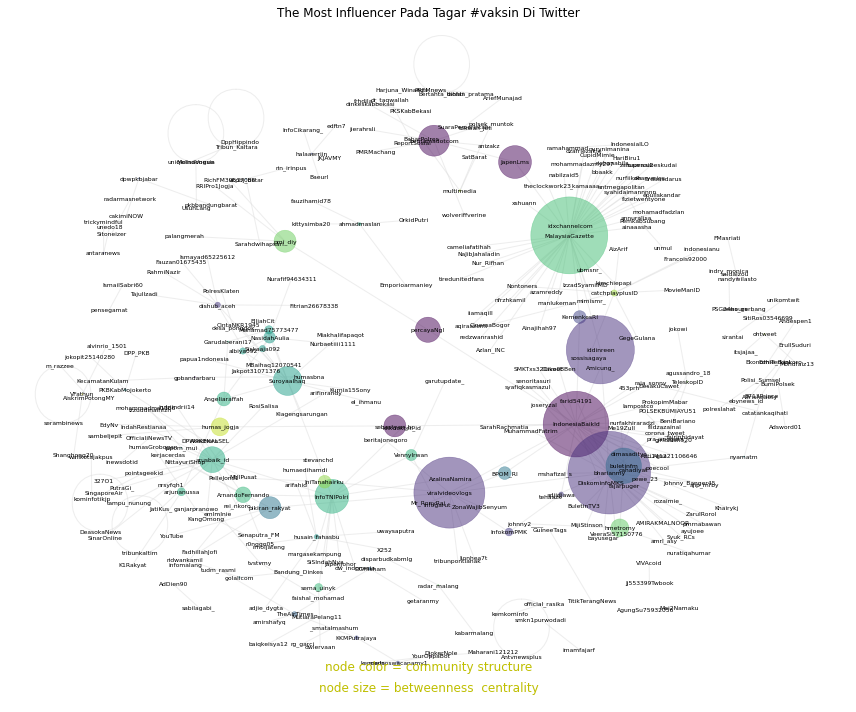

In [ ]:
lpc = nx.community.label_propagation_communities(gpd)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

# Draw grap
fig, ax = plt.subplots(figsize=(12, 10))
pos = nx.spring_layout(gpd, k=0.2)
nx.draw_networkx_labels(gpd, pos, font_size=6)
node_color = [community_index[n] for n in gpd]
node_size = [v * 80000 for v in d.values()]
nx.draw_networkx(
    gpd,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    width=1.0, alpha=0.5
    #alpha=0.8,
)

# Title/legend
font = {"color": "k",  "fontsize": 12}
ax.set_title("The Most Influencer Pada Tagar #vaksin Di Twitter", font)
# Change font color for legend
font["color"] = "y"

ax.text(
    0.50,
    0.05,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.50,
    0.02,
    "node size = betweenness  centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readability
ax.margins(0.02, 0.02)
fig.tight_layout()
plt.style.use('ggplot')
plt.axis("off")
plt.show()